# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


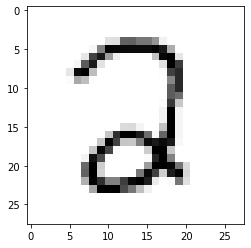

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2432
Training Accuracy: 0.6585, Testing Accuracy: 0.6532



Epoch 10, Loss 0.1074
Training Accuracy: 0.8982, Testing Accuracy: 0.9078



Epoch 20, Loss 0.0636
Training Accuracy: 0.9357, Testing Accuracy: 0.9466



Epoch 30, Loss 0.0472
Training Accuracy: 0.9502, Testing Accuracy: 0.9577



Epoch 40, Loss 0.0395
Training Accuracy: 0.9576, Testing Accuracy: 0.9622



Epoch 50, Loss 0.0352
Training Accuracy: 0.9611, Testing Accuracy: 0.9672



Epoch 60, Loss 0.0325
Training Accuracy: 0.9632, Testing Accuracy: 0.9677



Epoch 70, Loss 0.0305
Training Accuracy: 0.9643, Testing Accuracy: 0.9672



Epoch 80, Loss 0.029
Training Accuracy: 0.9670, Testing Accuracy: 0.9698



Epoch 90, Loss 0.0278
Training Accuracy: 0.9684, Testing Accuracy: 0.9703



Epoch 100, Loss 0.0268
Training Accuracy: 0.9692, Testing Accuracy: 0.9698



Epoch 110, Loss 0.0259
Training Accuracy: 0.9700, Testing Accuracy: 0.9698



Epoch 120, Loss 0.0252
Training Accuracy: 0.9715, Testing Accuracy: 0.9703



Epoch 130, Loss 0.0245
Training Accuracy: 0.9720, Testing Accuracy: 0.9693



Epoch 140, Loss 0.0239
Training Accuracy: 0.9726, Testing Accuracy: 0.9688



Epoch 150, Loss 0.0233
Training Accuracy: 0.9733, Testing Accuracy: 0.9693



Epoch 160, Loss 0.0228
Training Accuracy: 0.9741, Testing Accuracy: 0.9713



Epoch 170, Loss 0.0223
Training Accuracy: 0.9742, Testing Accuracy: 0.9718



Epoch 180, Loss 0.0219
Training Accuracy: 0.9750, Testing Accuracy: 0.9713



Epoch 190, Loss 0.0214
Training Accuracy: 0.9756, Testing Accuracy: 0.9703



Epoch 200, Loss 0.021
Training Accuracy: 0.9760, Testing Accuracy: 0.9708



Epoch 210, Loss 0.0206
Training Accuracy: 0.9764, Testing Accuracy: 0.9713



Epoch 220, Loss 0.0203
Training Accuracy: 0.9767, Testing Accuracy: 0.9713



Epoch 230, Loss 0.0199
Training Accuracy: 0.9775, Testing Accuracy: 0.9713



Epoch 240, Loss 0.0196
Training Accuracy: 0.9779, Testing Accuracy: 0.9713



0.001603291652002598

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2411
Training Accuracy: 0.7031, Testing Accuracy: 0.7061



Epoch 10, Loss 0.1017
Training Accuracy: 0.9096, Testing Accuracy: 0.9214



Epoch 20, Loss 0.0785
Training Accuracy: 0.9264, Testing Accuracy: 0.9400



Epoch 30, Loss 0.0679
Training Accuracy: 0.9357, Testing Accuracy: 0.9481



Epoch 40, Loss 0.0616
Training Accuracy: 0.9405, Testing Accuracy: 0.9506



Epoch 50, Loss 0.0572
Training Accuracy: 0.9436, Testing Accuracy: 0.9551



Epoch 60, Loss 0.0539
Training Accuracy: 0.9463, Testing Accuracy: 0.9567



Epoch 70, Loss 0.0514
Training Accuracy: 0.9484, Testing Accuracy: 0.9572



Epoch 80, Loss 0.0494
Training Accuracy: 0.9498, Testing Accuracy: 0.9582



Epoch 90, Loss 0.0477
Training Accuracy: 0.9512, Testing Accuracy: 0.9602



Epoch 100, Loss 0.0463
Training Accuracy: 0.9523, Testing Accuracy: 0.9617



Epoch 110, Loss 0.045
Training Accuracy: 0.9532, Testing Accuracy: 0.9627



Epoch 120, Loss 0.044
Training Accuracy: 0.9544, Testing Accuracy: 0.9632



Epoch 130, Loss 0.043
Training Accuracy: 0.9553, Testing Accuracy: 0.9642



Epoch 140, Loss 0.0422
Training Accuracy: 0.9559, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0414
Training Accuracy: 0.9567, Testing Accuracy: 0.9647



Epoch 160, Loss 0.0408
Training Accuracy: 0.9574, Testing Accuracy: 0.9657



Epoch 170, Loss 0.0401
Training Accuracy: 0.9582, Testing Accuracy: 0.9662



Epoch 180, Loss 0.0396
Training Accuracy: 0.9583, Testing Accuracy: 0.9667



Epoch 190, Loss 0.039
Training Accuracy: 0.9586, Testing Accuracy: 0.9677



Epoch 200, Loss 0.0386
Training Accuracy: 0.9588, Testing Accuracy: 0.9677



Epoch 210, Loss 0.0381
Training Accuracy: 0.9592, Testing Accuracy: 0.9672



Epoch 220, Loss 0.0377
Training Accuracy: 0.9597, Testing Accuracy: 0.9672



Epoch 230, Loss 0.0373
Training Accuracy: 0.9601, Testing Accuracy: 0.9672



Epoch 240, Loss 0.0369
Training Accuracy: 0.9604, Testing Accuracy: 0.9672



0.051288930463434385

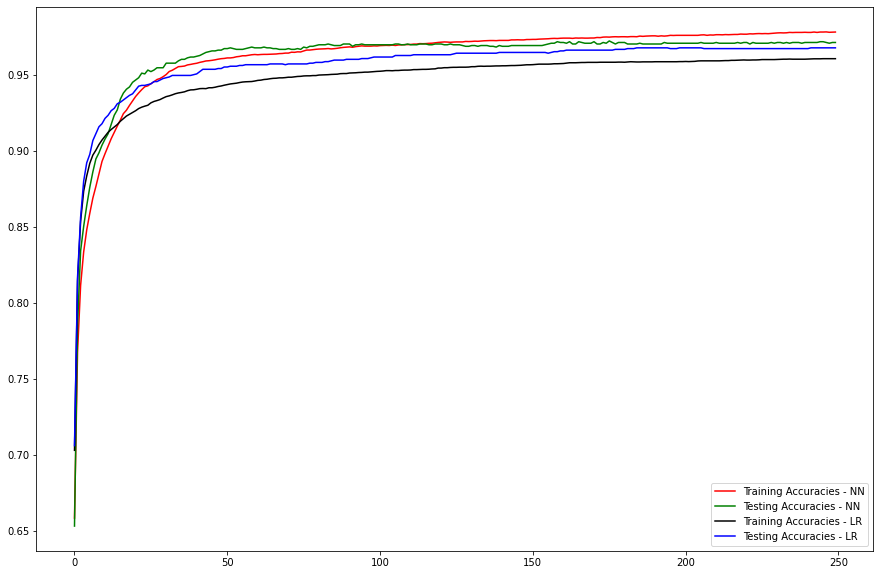

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

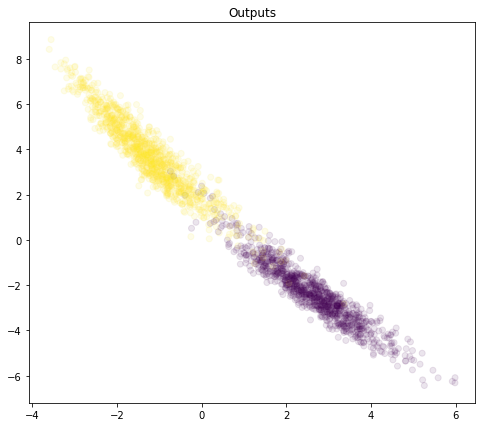

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

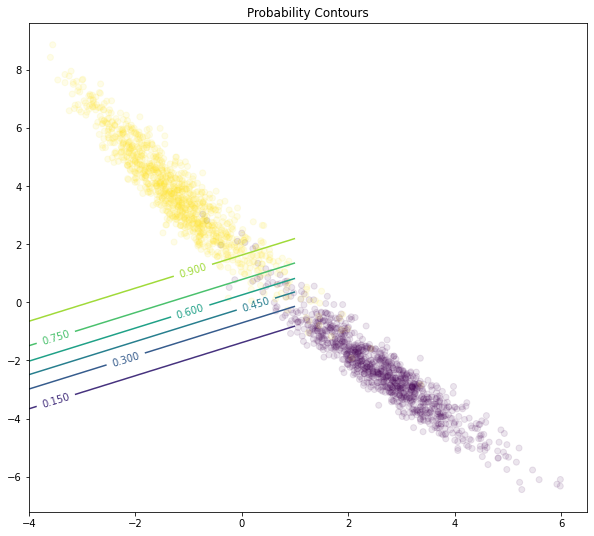

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );